<a href="https://colab.research.google.com/github/thashbihaafshin/20-Newsgroups-LSTM-Classification/blob/main/Source_Code/20_newsgroups_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install necessary libraries
!pip install scikit-learn pandas matplotlib seaborn nltk

# Imports
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'))
newsgroups_test  = fetch_20newsgroups(subset='test', remove=('headers','footers','quotes'))

# Combine into a single DataFrame for EDA
df = pd.DataFrame({'text': newsgroups_train.data, 'label': newsgroups_train.target})
df['category'] = df['label'].apply(lambda x: newsgroups_train.target_names[x])

# Display dataset shape and first few rows
print("Shape:", df.shape)
df.head()


Shape: (11314, 3)


,text,label,category
0,I was wondering if anyone out there could enli...,7,rec.autos
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space


In [3]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nData types:\n")
print(df.dtypes)


df.head()


print("\nMissing values in each column:\n")
print(df.isnull().sum())


df.describe(include='all')

Shape of dataset: (11314, 3)

Column names:
 Index(['text', 'label', 'category'], dtype='object')

Data types:

text        object
label        int64
category    object
dtype: object

Missing values in each column:

text        0
label       0
category    0
dtype: int64


,text,label,category
count,11314,11314.000000,11314
unique,10994,NaN,20
top,,NaN,rec.sport.hockey
freq,218,NaN,600
mean,NaN,9.293000,NaN
std,NaN,5.562719,NaN
min,NaN,0.000000,NaN
25%,NaN,5.000000,NaN
50%,NaN,9.000000,NaN
75%,NaN,14.000000,NaN


In [4]:
# Step 7: Category distribution
print("\nNumber of documents per category:\n")
print(df['category'].value_counts())

# Step 8: Document length statistics
df['text_length'] = df['text'].apply(len)
print("\nText length summary:\n")
print(df['text_length'].describe())



Number of documents per category:

category
rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: count, dtype: int64

Text length summary:

count    11314.000000
mean      1218.135496
std       4038.256477
min          0.000000
25%        237.000000
50%        491.000000
75%        984.750000
max      74878.000000
Name: text_length, dtype: float64


In [5]:
# Check again for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Remove missing or empty text entries
df = df[df['text'].notnull()]
df = df[df['text'].str.strip().astype(bool)]

# Remove duplicates if any
df = df.drop_duplicates(subset='text', keep='first')

# Handle text-length outliers
# Remove documents that are extremely short (<20 characters)
df = df[df['text'].apply(len) > 20]

# Display new shape
print("\nShape after cleaning:", df.shape)

# Check basic stats again
print("\nText length summary after cleaning:\n")
print(df['text'].apply(len).describe())


Missing values before cleaning:
 text           0
label          0
category       0
text_length    0
dtype: int64

Shape after cleaning: (10924, 4)

Text length summary after cleaning:

count    10924.000000
mean      1259.546595
std       4103.374211
min         21.000000
25%        256.000000
50%        510.000000
75%       1015.000000
max      74878.000000
Name: text, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['category'])

# Split into train, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label_encoded'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label_encoded'])

print("Training set:", train_df.shape)
print("Validation set:", val_df.shape)
print("Test set:", test_df.shape)


Training set: (8739, 5)
Validation set: (1092, 5)
Test set: (1093, 5)


In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os

# Define NLTK data path
nltk_data_path = os.path.join(os.path.expanduser("~"), "nltk_data")
nltk.data.path.append(nltk_data_path)

# Download resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')  # <-- ADD THIS LINE
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
train_df['clean_text'] = train_df['text'].apply(clean_text)
val_df['clean_text'] = val_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

train_df[['text', 'clean_text']].head(3)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text
7459,"\nIt does give privacy, just not absolute priv...",give privacy absolute privacy announcement fro...
357,\nI have a Lightening Scan Pro 256 hand scanne...,lightening scan pro hand scanner came scanning...
1895,A friend of mine has problems running Spigot L...,friend mine problem running spigot lc lc iii c...


/tmp/ipython-input-3456034590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=train_df, order=train_df['category'].value_counts().index, palette='viridis')


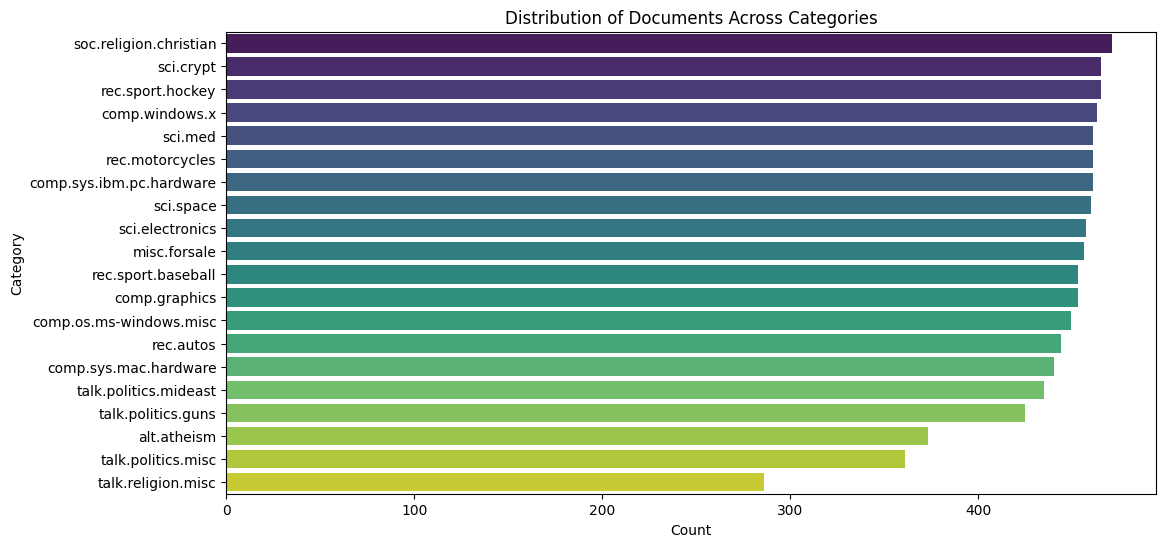

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(y='category', data=train_df, order=train_df['category'].value_counts().index, palette='viridis')
plt.title('Distribution of Documents Across Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


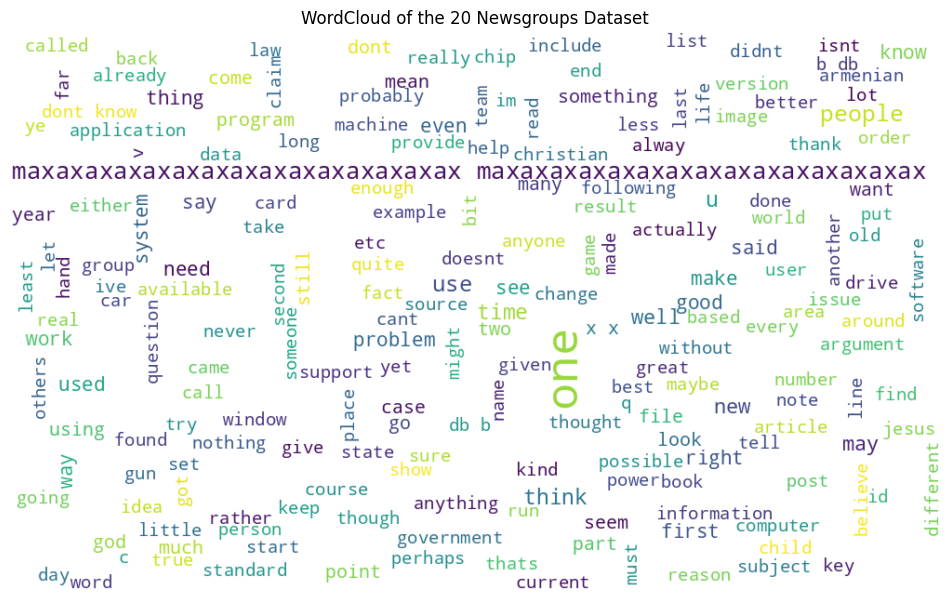

In [17]:
from wordcloud import WordCloud

all_words = ' '.join(train_df['clean_text'])
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_words)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of the 20 Newsgroups Dataset')
plt.show()



/tmp/ipython-input-991216792.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words, palette='plasma')


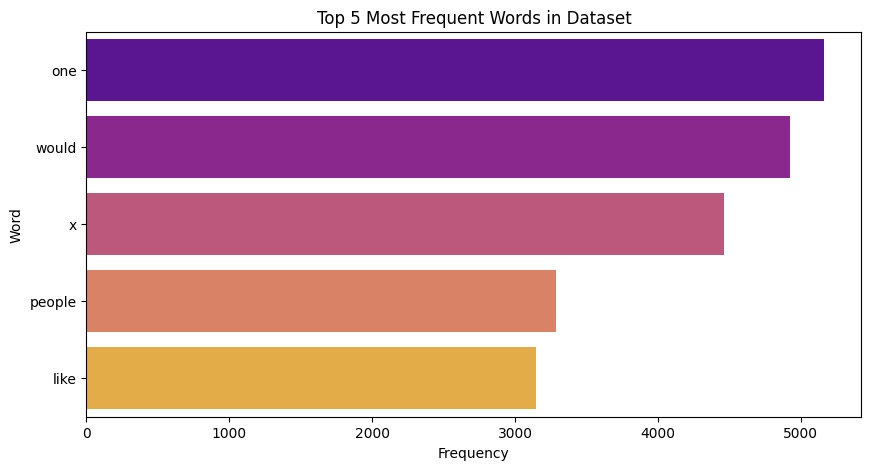

In [18]:
from collections import Counter
word_counts = Counter(' '.join(train_df['clean_text']).split())
common_words = pd.DataFrame(word_counts.most_common(5), columns=['word', 'count'])
plt.figure(figsize=(10,5))
sns.barplot(x='count', y='word', data=common_words, palette='plasma')
plt.title('Top 5 Most Frequent Words in Dataset')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


/tmp/ipython-input-2670304345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='text_length', data=train_df, palette='coolwarm')


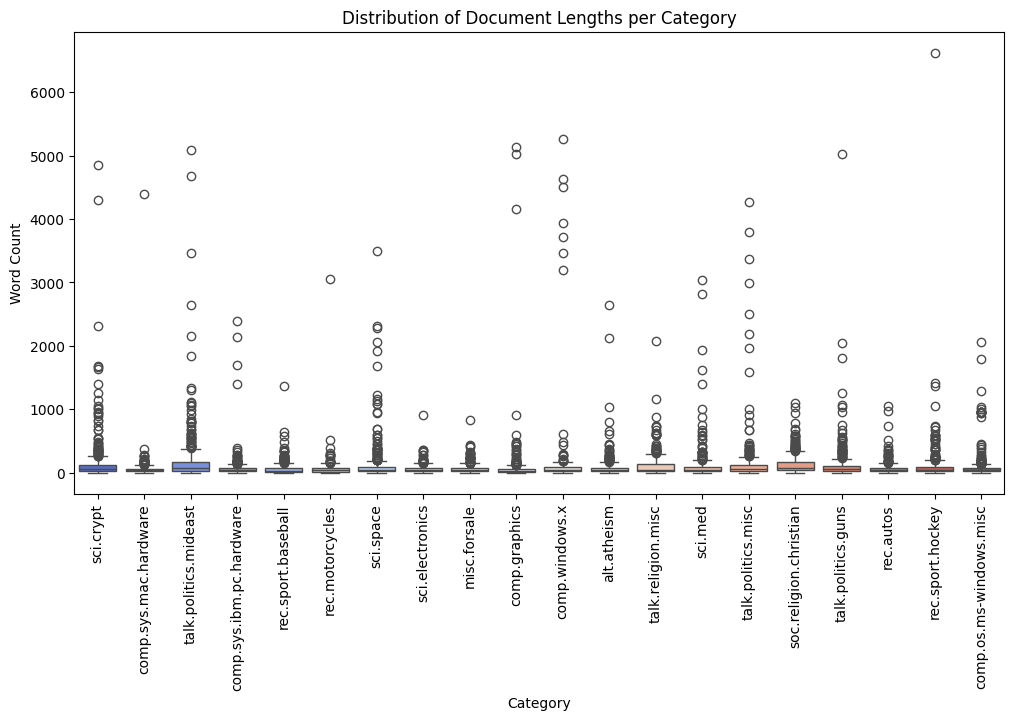

In [19]:
train_df['text_length'] = train_df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='text_length', data=train_df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Distribution of Document Lengths per Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()


/tmp/ipython-input-718423237.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='coolwarm')


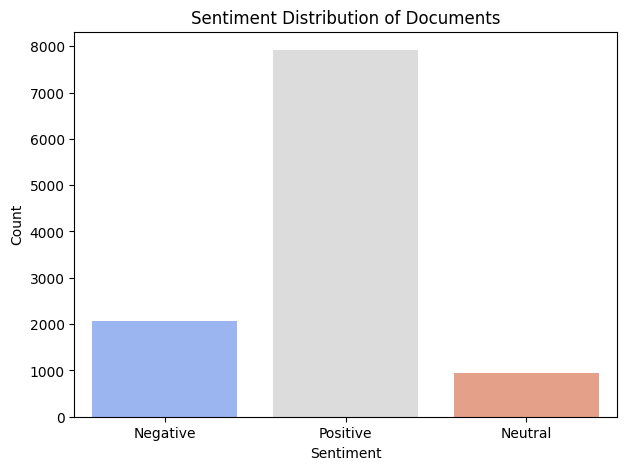

In [20]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
# Compute sentiment polarity for each document
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Classify as Positive, Negative, or Neutral
df['sentiment_label'] = df['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)
# Plot sentiment distribution
plt.figure(figsize=(7,5))
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title("Sentiment Distribution of Documents")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# ---- 1. Encode labels ----
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(train_df['category'])
y_val_enc = label_encoder.transform(val_df['category'])
y_test_enc = label_encoder.transform(test_df['category'])

num_classes = len(label_encoder.classes_)

# ---- 2. Tokenize text ----
max_words = 10000   # vocab size
max_len = 200       # max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['clean_text'])

X_train_seq = tokenizer.texts_to_sequences(train_df['clean_text'])
X_val_seq = tokenizer.texts_to_sequences(val_df['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['clean_text'])

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

vocab_size = len(tokenizer.word_index) + 1

# ---- 3. Build LSTM Model ----
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# ---- 4. Compile the model ----
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# ---- 5. Display model summary ----
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
# ---- 6. Train the model ----
history = model.fit(
    X_train_pad, y_train_enc,
    validation_data=(X_val_pad, y_val_enc),
    epochs=10,        # increase if time permits
    batch_size=64,
    verbose=1
)


Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 74s 534ms/step - accuracy: 0.0803 - loss: 2.9142 - val_accuracy: 0.0705 - val_loss: 2.9507
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 74s 540ms/step - accuracy: 0.0816 - loss: 2.8922 - val_accuracy: 0.0723 - val_loss: 2.9447
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 75s 546ms/step - accuracy: 0.1036 - loss: 2.8447 - val_accuracy: 0.0705 - val_loss: 2.9630
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 74s 539ms/step - accuracy: 0.1179 - loss: 2.7959 - val_accuracy: 0.0668 - val_loss: 3.0051
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 74s 540ms/step - accuracy: 0.1206 - loss: 2.7872 - val_accuracy: 0.0742 - val_loss: 3.0099
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 539ms/step - accuracy: 0.1281 - loss: 2.7777 - val_accuracy: 0.0668 - val_loss: 3.0305
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 74s 540ms/step - accuracy: 0.1554 - loss: 2.6863 - val_accuracy: 0.2024 - val_loss: 2.4390
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 81s 531ms/step - accuracy: 0.2461 - loss: 2

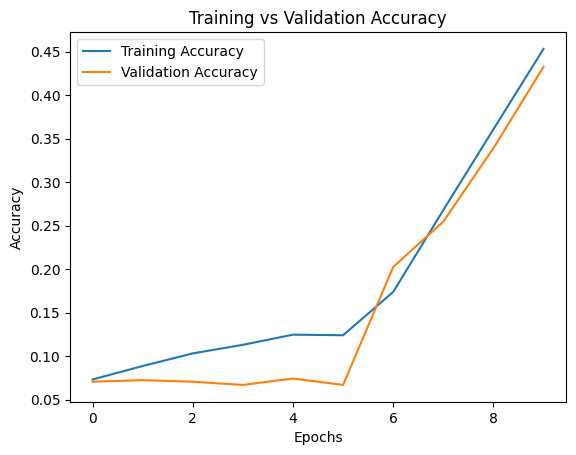

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


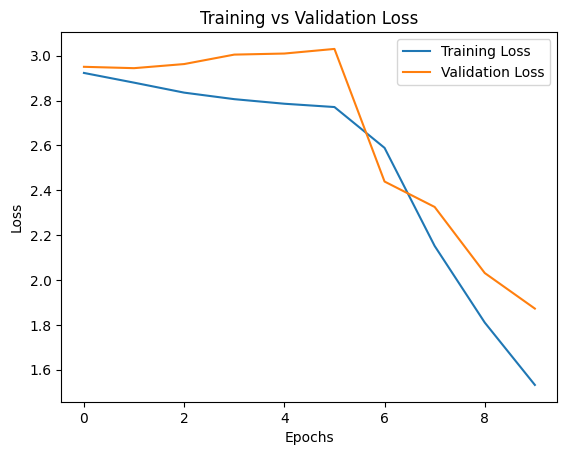

In [33]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step


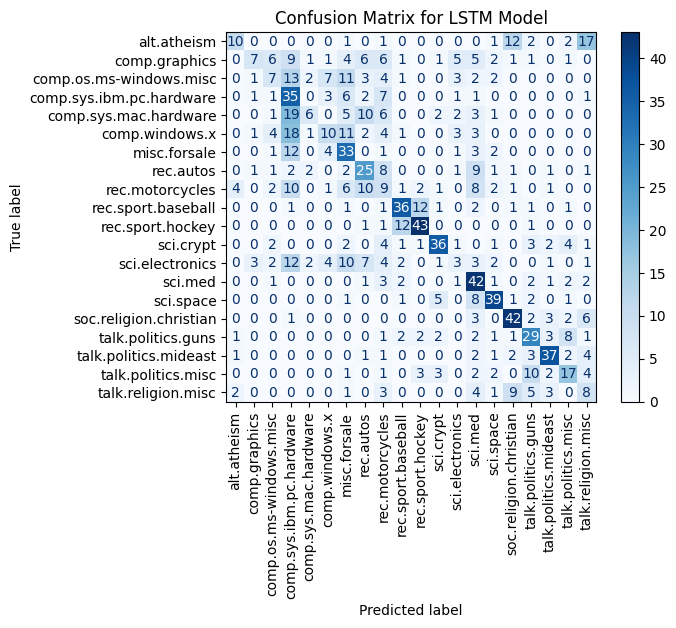

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = np.argmax(model.predict(X_test_pad), axis=1)

cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title('Confusion Matrix for LSTM Model')
plt.show()
